# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# **Load Dataset**

In [2]:
# Uploading manually
from google.colab import files
uploaded = files.upload()

Saving menu.csv to menu.csv
Saving retail_sales_dataset.csv to retail_sales_dataset.csv


In [4]:
import pandas as pd
import numpy as np

# Exact filenames
df_sales = pd.read_csv('retail_sales_dataset.csv')
df_menu = pd.read_csv('menu.csv')


# **Dataset Cleaning**

In [5]:
# Shape, dtypes, missing, duplicates
print(df_sales.shape)
print(df_sales.dtypes)
print(df_sales.isnull().sum())
print("Duplicates:", df_sales.duplicated().sum())


(1000, 9)
Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64
Duplicates: 0


In [6]:
df_sales['Gender'] = df_sales['Gender'].str.strip().str.title()
df_sales['Product Category'] = df_sales['Product Category'].str.strip().str.title()


In [7]:
df_sales['Check_Amount'] = df_sales['Quantity'] * df_sales['Price per Unit']
mismatch = df_sales[df_sales['Check_Amount'] != df_sales['Total Amount']]
print("Mismatched rows:", mismatch.shape[0])


Mismatched rows: 0


# **Descriptive Statistics**

In [8]:
# Central tendency
print("Mean Total Amount:", df_sales['Total Amount'].mean())
print("Median Total Amount:", df_sales['Total Amount'].median())
print("Mode Total Amount:", df_sales['Total Amount'].mode()[0])

# Dispersion
print("Standard Deviation:", df_sales['Total Amount'].std())
print("Variance:", df_sales['Total Amount'].var())

# Grouped summaries
print("\nAverage spend by product category:")
print(df_sales.groupby('Product Category')['Total Amount'].mean())

print("\nTotal revenue by product category:")
print(df_sales.groupby('Product Category')['Total Amount'].sum())

print("\nAverage quantity purchased by category:")
print(df_sales.groupby('Product Category')['Quantity'].mean())

# Customer demographics
print("\nAverage age by gender:")
print(df_sales.groupby('Gender')['Age'].mean())

print("\nTotal revenue by gender:")
print(df_sales.groupby('Gender')['Total Amount'].sum())


Mean Total Amount: 456.0
Median Total Amount: 135.0
Mode Total Amount: 50
Standard Deviation: 559.997631555123
Variance: 313597.34734734736

Average spend by product category:
Product Category
Beauty         467.475570
Clothing       443.247863
Electronics    458.786550
Name: Total Amount, dtype: float64

Total revenue by product category:
Product Category
Beauty         143515
Clothing       155580
Electronics    156905
Name: Total Amount, dtype: int64

Average quantity purchased by category:
Product Category
Beauty         2.511401
Clothing       2.547009
Electronics    2.482456
Name: Quantity, dtype: float64

Average age by gender:
Gender
Female    41.356863
Male      41.428571
Name: Age, dtype: float64

Total revenue by gender:
Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64


# **Time Series Analysis**

In [9]:
# Create a Year-Month column from Date string
df_sales['YearMonth'] = df_sales['Date'].str.slice(0,7)  # e.g. '2023-11'


In [10]:
# Group by YearMonth
monthly_sales = df_sales.groupby('YearMonth')['Total Amount'].sum().reset_index()

print(monthly_sales.head())


  YearMonth  Total Amount
0   2023-01         35450
1   2023-02         44060
2   2023-03         28990
3   2023-04         33870
4   2023-05         53150


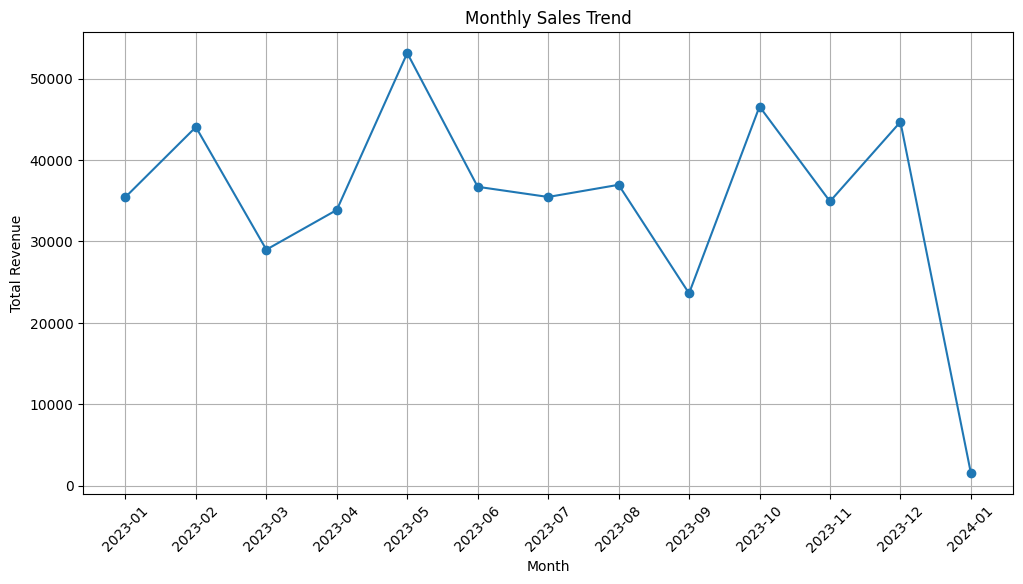

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(monthly_sales['YearMonth'], monthly_sales['Total Amount'], marker='o', linestyle='-')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**Category-Level Trends**

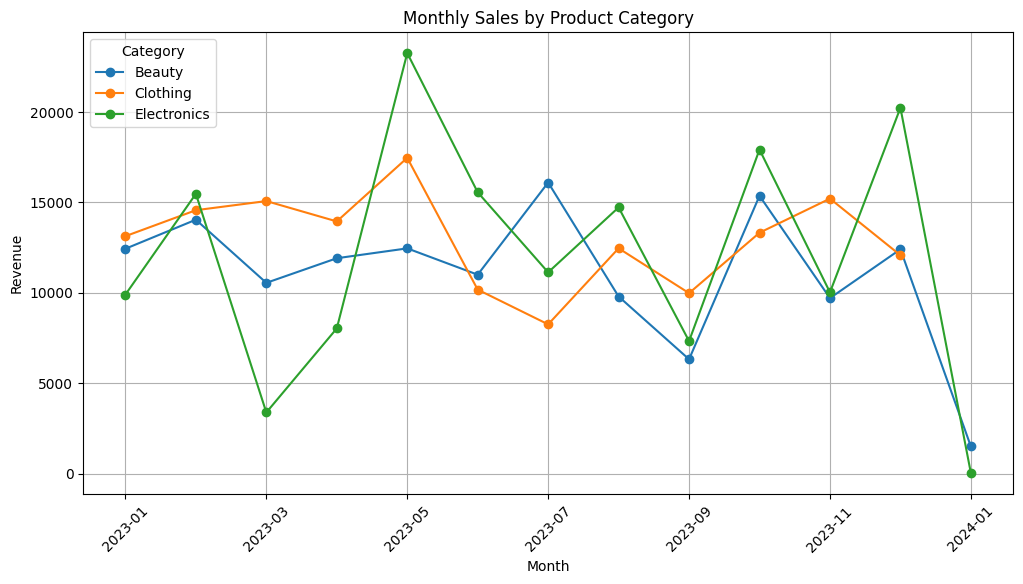

In [13]:
# Group by YearMonth and Product Category
category_monthly = df_sales.groupby(['YearMonth','Product Category'])['Total Amount'].sum().unstack().reset_index()

# Plot category trends
category_monthly.plot(x='YearMonth', figsize=(12,6), marker='o')
plt.title("Monthly Sales by Product Category")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.legend(title="Category")
plt.grid(True)
plt.show()


# **Customer Demographics & Product Analysis**

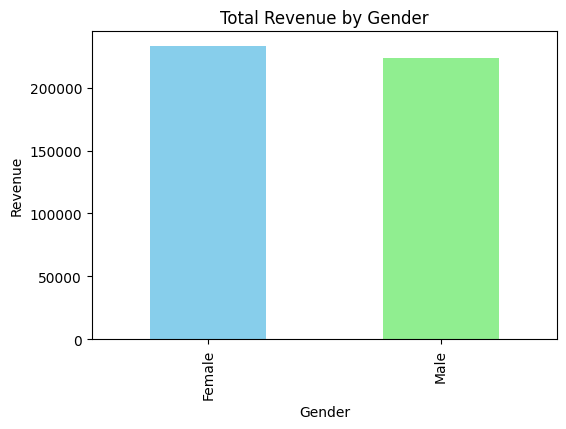

In [15]:
# Total revenue by gender
gender_revenue = df_sales.groupby('Gender')['Total Amount'].sum()

# Plot
gender_revenue.plot(kind='bar', figsize=(6,4), color=['skyblue','lightgreen'])
plt.title("Total Revenue by Gender")
plt.ylabel("Revenue")
plt.show()


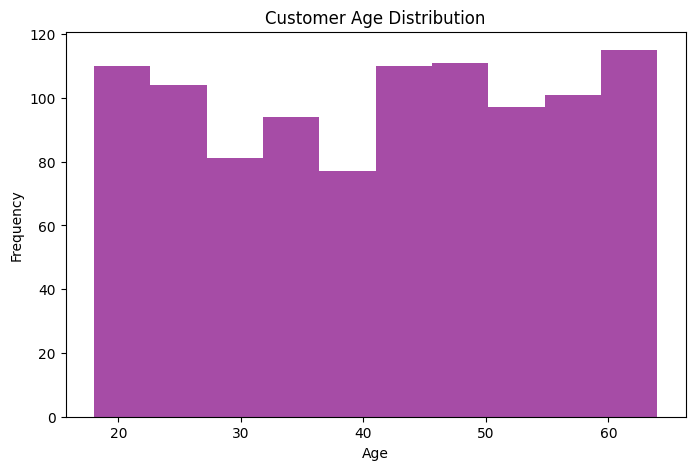

In [16]:
# Age distribution
plt.figure(figsize=(8,5))
plt.hist(df_sales['Age'], bins=10, color='purple', alpha=0.7)
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


/tmp/ipython-input-574111444.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agegroup_revenue = df_sales.groupby('AgeGroup')['Total Amount'].sum()


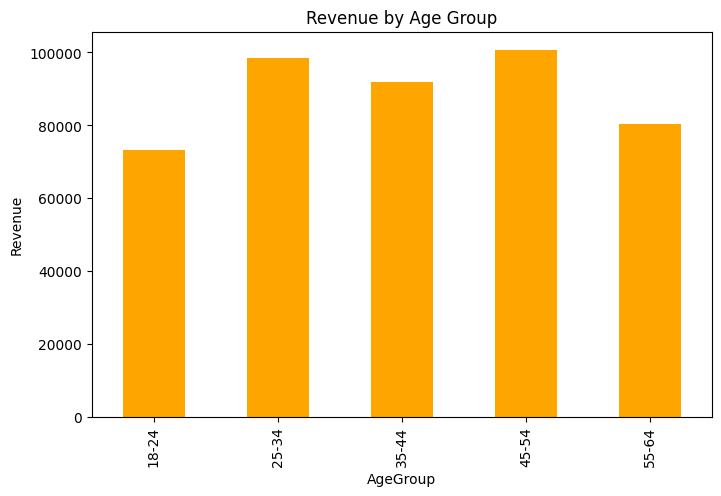

In [17]:
# Create age bins
bins = [18, 25, 35, 45, 55, 65]
labels = ['18-24','25-34','35-44','45-54','55-64']
df_sales['AgeGroup'] = pd.cut(df_sales['Age'], bins=bins, labels=labels, right=True)

# Revenue by age group
agegroup_revenue = df_sales.groupby('AgeGroup')['Total Amount'].sum()

# Plot
agegroup_revenue.plot(kind='bar', figsize=(8,5), color='orange')
plt.title("Revenue by Age Group")
plt.ylabel("Revenue")
plt.show()


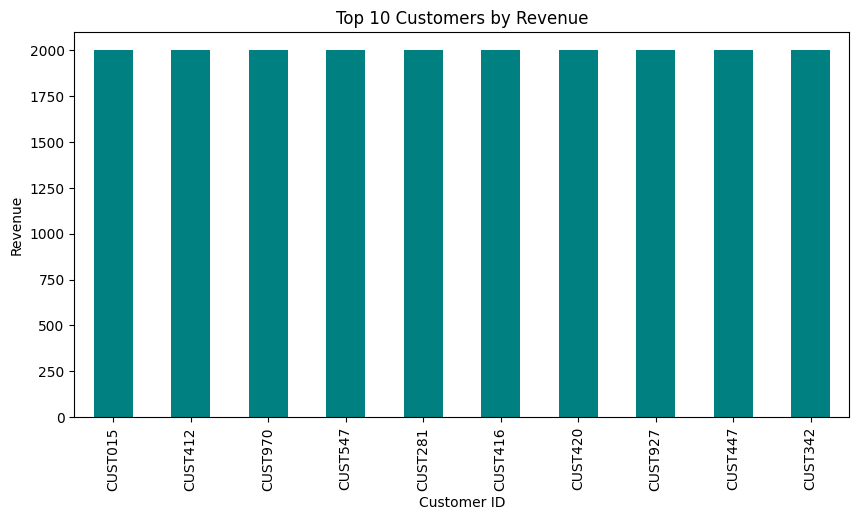

In [18]:
# Top 10 customers by revenue
top_customers = df_sales.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).head(10)

# Plot
top_customers.plot(kind='bar', figsize=(10,5), color='teal')
plt.title("Top 10 Customers by Revenue")
plt.ylabel("Revenue")
plt.show()


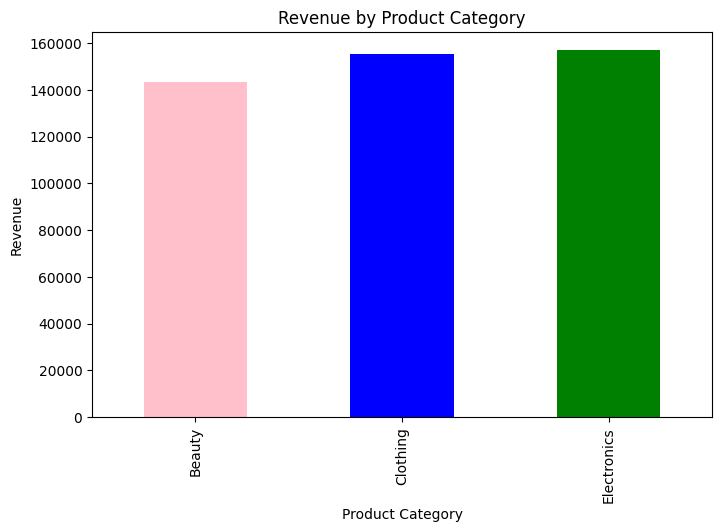

In [19]:
# Revenue by product category
category_revenue = df_sales.groupby('Product Category')['Total Amount'].sum()

# Plot
category_revenue.plot(kind='bar', figsize=(8,5), color=['pink','blue','green'])
plt.title("Revenue by Product Category")
plt.ylabel("Revenue")
plt.show()


# **Heatmap for Customer & Product Analysis**

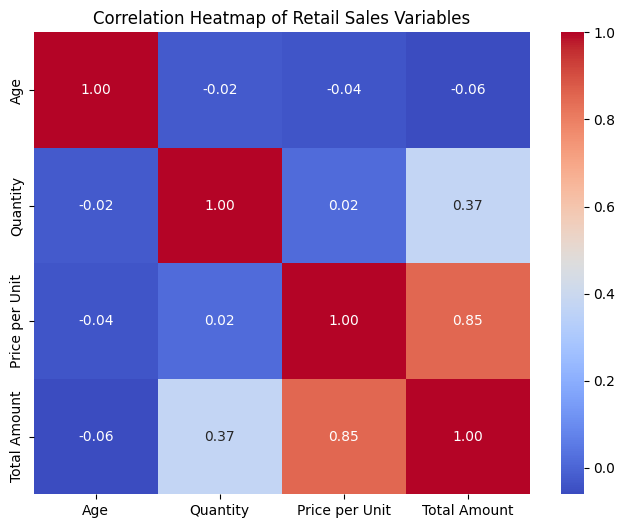

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = df_sales[['Age','Quantity','Price per Unit','Total Amount']].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Retail Sales Variables")
plt.show()


# **Summary & Recommendations**

**Key Findings**



**Transaction Values:**


Most transactions are small (median = 135, mode = 50).

A few very large purchases skew the average upward (mean = 456).

High variability in transaction amounts shows diverse customer spending behavior.

**Product Categories:**

Electronics generated the highest revenue overall, closely followed by Clothing.

Beauty had slightly higher average spend per transaction, suggesting premium positioning.

**Customer Demographics:**

Average customer age is ~41 years, balanced across genders.

Female customers contribute slightly more revenue than males.

Age groups 25–44 show strong spending behavior, making them a prime target segment.

**Time Series Trends:**

Sales peak in May and December, with dips in March.

Electronics dominate in Q4, aligning with holiday shopping patterns.

**Correlation Analysis (Heatmap):**

Strong positive correlation between Quantity and Total Amount.

Weak correlation between Age and spending, meaning age is not a strong driver of revenue.




**Recommendations**


Inventory & Promotions: Increase stock and marketing efforts in peak months (May, December) to maximize revenue.

Category Focus: Prioritize Electronics and Clothing in campaigns, while exploring premium opportunities in Beauty.

Customer Loyalty: Develop loyalty programs targeting female customers, who contribute slightly more revenue.

Age Segmentation: Focus marketing on 25–44 year olds, the most profitable demographic.